# D213: Advanced Data Analytics - Task 2
***

### By: Leng Yang
### Student ID: 012298452
### Date: October 18, 2024
***
<br>
<br>
<br>

## Table of Contents
* [A1. Research Question](#A1)
* [A2. Objectives or Goals](#A2)
* [A3. Prescribed Network](#A3)
* [B1. Data Exploration](#B1)
* [B2. Tokenization](#B2)
* [B3. Padding Process](#B3)
* [B4. Categories of Sentiment](#B4)
* [B5. Steps to Prepare the Data](#B5)
* [B6. Prepared Data Set](#B6)
* [C1. Model Summary](#C1)
* [C2. Network Architecture](#C2)
* [C3. Hyperparameters](#C3)
* [D1. Stopping Criteria](#D1)
* [D2. Fitness](#D2)
* [D3. Training Process](#D3)
* [D4. Predictive Accuracy](#D4)
* [E. Code](#E)
* [F. Functionality](#F)
* [G. Recommendations](#G)
* [H. Reporting](#H)
* [I. Sources for Third-Party Code](#I)
* [J. Sources](#J)

<BR>

<BR>

<BR>

<BR>

## A1. Research Question <a class="anchor" id="A1"></a>

Can sentiment analysis be used on previous Amazon product reviews to predict positive or negative user opinions on products and services?

<BR>

## A2. Objectives or Goals <a class="anchor" id="A2"></a>

This analysis uses a sentiment analysis technique to look at previous user reviews of Amazon products and predict future or unseen reviews as positive or negative. Since this is a classification problem, the aim is to generate a model with high predictive accuracy. This analysis would create an automated process to label reviews and thus would increase the speed at which the company can understand how its products are valued. With such information, the company can appropriately deal with any concerns.

<BR>

## A3. Prescribed Network <a class="anchor" id="A3"></a>

A type of neural network useful for text classification is a recurrent neural network (RNN). This type of neural network is beneficial as it can capture sequential dependencies in data, such as the semantics that go into language and writing, which is something that more simple neural networks, such as feedforward neural networks, fail to achieve (GeeksforGeeks, 2024).

<BR>

## B1. Data Exploration <a class="anchor" id="B1"></a>

In [19]:
#Load in common analytical packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

#Read in file into dataframe
df = pd.read_csv('./sentiment labelled sentences/amazon_cells_labelled.txt', sep='\t', header=None, names=['review', 'label'])
#Check first five entries
df.head()

,review,label
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1


In [20]:
#Check dataframe info and any missing values -- none present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1000 non-null   object
 1   label   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


### Presence of unusual characters (e.g., emojis, non-English characters)

A check of the characters present in all reviews was performed. The review contained alphabet letters, both lowercase and uppercase and numbers. Punctuation marks and special characters were also seen, such as: `!`, `"`, `#`, `%`, `&`, `*`, `+`, `/`, and so on. Below is an output of all characters captured in the reviews.

In [22]:
#Check for all characters present in reviews
char_list = []
for review in df.review:
    for char in review:
        if char not in char_list:
            char_list.append(char)
char_list.sort()
print(char_list)

[' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


### Vocabulary size

The vocabulary size was determined after the data had been cleaned. This cleaning process involved removing numbers, punctuations, special characters, and extra white space. After that, the natural language toolkit's (`nltk`) `stopwords` module was loaded to remove any words without practical meaning. This was done to reduce the input vector so that the model training process can be completed faster and more efficiently. Once that was complete, the reviews were tokenized, and then the vocabulary size was calculated, which resulted in a size of 1684.

In [25]:
#Import packages for cleaning
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Create set of English stop words and empty list to hold tokenized reviews
stop_words = set(stopwords.words('english'))
reviews_list = []

#Removing unusual characters
for review in df.review:
    #Remove numbers, punctuations, and special characters
    review = re.sub('[^a-zA-Z]', ' ', review)
    
    #Remove single characters
    review = re.sub(r"\s+[a-zA-Z]\s+", ' ', review)
    
    #Remove extra white space
    review = re.sub(r"\s+", ' ', review)
    
    #Convert to lowercase
    review = review.lower()
    
    #Tokenize review, remove Stop Words from review, and append to reviews list
    reviews_list.append([word for word in word_tokenize(review) if word not in stop_words])
    
#Place transformed and tokenized reviews into dataframe
df['tokenized'] = reviews_list

In [26]:
#Display of review vs tokenized review
df.head()

,review,label,tokenized
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0,"[way, plug, us, unless, go, converter]"
1,"Good case, Excellent value.",1,"[good, case, excellent, value]"
2,Great for the jawbone.,1,"[great, jawbone]"
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0,"[tied, charger, conversations, lasting, minutes, major, problems]"
4,The mic is great.,1,"[mic, great]"


In [27]:
#Import packages for tokenization
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

#Tokenize data and grab word_index dictionary
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.tokenized)
word_index = tokenizer.word_index

#Vocabulary size
vocab_size = len(word_index) + 1
vocab_size

1684

### Proposed word embedding length

Word embeddings represent words in a numerical format, such as in vectors within an n-dimensional space (Barnard, 2024). The word embedding length can be determined by taking the fourth root of the vocabulary size. This was determined to be 6.

In [29]:
embed_length = int(np.sqrt(np.sqrt(vocab_size)))
embed_length

6

### Statistical justification for the chosen maximum sequence length

The review with the longest sequence or the most number of words determines the maximum sequence length. Shorter reviews can be padded to account for the difference in lengths.

In [31]:
lengths = []
for review in df.tokenized:
    lengths.append(len(review))
max_length = max(lengths)
max_length

16

<BR>

## B2. Tokenization <a class="anchor" id="B2"></a>

The goal of the tokenization process is to separate words into chunks. For instance, in this analysis, the words of each review were divided into items in a list. Alongside this process, a word index that contains each word is generated, which is then used to aid the model during training.

As stated, the data was first cleaned before tokenizing, with numbers, punctuations, special characters, and stop words removed. Once this cleaning was done, the reviews were then tokenized. This process is illustrated in `Vocabulary size` under Section B1. Once tokenized, the text was transformed into numerical vectors per the word index dictionary.

In [35]:
#Convert tokenized data into sequences
word_sequence = tokenizer.texts_to_sequences(df.tokenized)

In [36]:
#Example vectorized sequence
word_sequence[0]

[128, 80, 428, 313, 149, 681]

<BR>

## B3. Padding Process <a class="anchor" id="B3"></a>

The padding process involves adding additional units to the vectorized sequences to ensure all sequences are the same length. This process is done as it is required for the model to run correctly. Post-padding was conducted in this analysis, wherein the additional units were added after the numerical sequences. Below is also an example of the first sequence after padding.

In [40]:
#Import package for padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Pad sequences using a 'post' method and print an example
padded_sequence = pad_sequences(word_sequence, maxlen=max_length, padding='post')
padded_sequence[0]

array([128,  80, 428, 313, 149, 681,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0])

<BR>

## B4. Categories of Sentiment <a class="anchor" id="B4"></a>

There are two categories of sentiment. The labels within the data set are `0` and `1`, which correspond to a negative and positive review, respectively. This also indicates a binary classification problem, as only two categories exist. The final layer will use a `sigmoid` activation function.

<BR>

## B5. Steps to Prepare the Data <a class="anchor" id="B5"></a>

Below is a list of the steps taken to prepare the data.
* The "amazon_cells_labelled.txt" file was loaded into a Pandas data frame. From here, a check for missing values was conducted, of which none were found.
* The data was briefly explored, looking for any unusual characters.
* The data was cleaned, removing unusual characters, such as numbers, punctuations, and other special characters.
* All remaining letters were then set to lowercase.
* Each review was tokenized, separating the review string into individual words in a list.
* Once tokenized, stop words were removed as defined in the natural language toolkit.
* The tokenized data was then transformed from texts into sequences with assistance from the word index created during tokenization.
* Once sequenced, a padding process was conducted using a 'post' method, filling in additional units after the original sequence to conform all sequences to an equal length.
* Lastly, the data was split into training and testing sets using an 80/20 split.

<BR>

## B6. Prepared Data Set <a class="anchor" id="B6"></a>

The file names of the training and testing data are listed below.
* D213_Task2_X_train.csv
* D213_Task2_X_test.csv
* D213_Task2_y_train.csv
* D213_Task2_y_test.csv

In [50]:
#Import package to split data
from sklearn.model_selection import train_test_split

#Split data into train and test sets using 80/20 split
X_train, X_test, y_train, y_test = train_test_split(padded_sequence, df.label, test_size=0.2, random_state=10)

In [51]:
#Check shape of sets
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (800, 16)
X_test: (200, 16)
y_train: (800,)
y_test: (200,)


In [52]:
#Convert to csv files
pd.DataFrame(X_train).to_csv('D213_Task2_X_train.csv', index=False)
pd.DataFrame(X_test).to_csv('D213_Task2_X_test.csv', index=False)
pd.DataFrame(y_train).to_csv('D213_Task2_y_train.csv', index=False)
pd.DataFrame(y_test).to_csv('D213_Task2_y_test.csv', index=False)

<BR>

## C1. Model Summary <a class="anchor" id="C1"></a>

In [55]:
#Import packages to build model and for model validation
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping

#Add early stopping criteria
stopping = EarlyStopping(patience=2)

#Build model
model = Sequential([
    Embedding(vocab_size, embed_length, input_length=max_length, input_shape=(X_train.shape[1],)),
    GlobalAveragePooling1D(),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

#Complie model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Print summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 16, 6)          │        10,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 6)              │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │           700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,005 (82.05 KB)

 Trainable params: 21,005 (82.05 KB)

 Non-trainable params: 0 (0.00 B)

<BR>

## C2. Network Architecture <a class="anchor" id="C2"></a>

The model has five layers with a total of 21,005 parameters. The input layer consists of the `Embedding` layer. The next layer is a flattening layer, `GlobalAveragePooling1D`, used to reshape the inputs. The following hidden layers are composed of two `Dense` layers. The output layer consists of another `Dense` layer.

<BR>

## C3. Hyperparameters <a class="anchor" id="C3"></a>

The model used two activation function types: `relu` and `sigmoid`. A sigmoid activation function maps inputs into output values between 0 and 1, which closely matches the classification problem of this analysis. The rectified linear unit (ReLU) activation function was used because it is the most common type in hidden layers. Additionally, the ReLU function is more computationally efficient than other activation functions since, due to its functional properties, only a certain number of nodes remain activated after transformation (V7, n.d.).

The number of nodes per layer was initially set arbitrarily, and then some experimentation was performed to find the optimal number of nodes. After some testing, increasing the number of nodes in the hidden layer did not significantly increase validation accuracy, so a value of 100 was kept. Additionally, the output contained only one node due to the nature of the classification problem of this analysis.

The loss function, `binary_crossentropy`, was chosen because of the nature of the classification problem of this analysis.

The `adam` optimizer was chosen due to its popularity in deep learning. Additionally, the optimizer performs relatively well due to its robustness to hyperparameter choices and fast convergence time, as it "converges faster than traditional gradient descent-based optimizers" (Vishwakarma, 2024).

An early stopping criterion was used to prevent overfitting during model training. The `EarlyStopping` class from Keras was implemented to monitor the validation loss score. It was set with a patience of two so that the training period would end if the score did not further decrease after two additional epochs from the current one.

Since this analysis involves a classification problem, the accuracy score was the evaluation metric. This score determines the number of correct predictions over all predictions, with knowledge of correctness using the known labels.

<BR>

## D1. Stopping Criteria <a class="anchor" id="D1"></a>

A stopping criterion is necessary as the model would continue to train all the way to the number of specified epochs without one. This presents a problem because it does not generalize well to unseen data when the model learns too much of the training patterns. This issue is visualized in section D3, where the training loss continues to approach zero while the validation loss stabilizes, hence where overfitting begins.

An early stopping criterion was used to prevent overfitting during model training. The `EarlyStopping` class from Keras was implemented to monitor the validation loss score. It was set with a patience of two so that the training period would end if the loss score did not further decrease after two additional epochs from the current one.

The final training epoch is captured in section `D3`, where the model was fitted and trained.

<BR>

## D2. Fitness <a class="anchor" id="D2"></a>

While some overfitting exists in the model, some methods were used to limit it. The first method involved training and tuning the model in an iterative process, beginning with a small neural network and slowly increasing it. The network size reached capacity when adding additional layers, and the number of nodes did not drastically improve validation accuracy and loss, which led to the final neural network in this analysis.

Overfitting can be seen in the visualization in section D3 when looking at the loss scores. Overfitting is easily seen where the validation loss begins to taper out. In contrast, the training loss continually approaches zero, indicating the model has learned too much of the training data's patterns while starting to fail to generalize on the validation data, which acted as unseen data to test against during the model training process. To counteract overfitting, an early stopping criterion was put in place. The model would stop its training process when the validation loss scores failed to improve after a couple of epochs.

<BR>

## D3. Training Model <a class="anchor" id="D3"></a>

In [67]:
#Fit model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, callbacks=stopping)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4857 - loss: 0.6934 - val_accuracy: 0.5437 - val_loss: 0.6924
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6198 - loss: 0.6919 - val_accuracy: 0.4563 - val_loss: 0.6929
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5649 - loss: 0.6894 - val_accuracy: 0.6062 - val_loss: 0.6877
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7809 - loss: 0.6731 - val_accuracy: 0.5250 - val_loss: 0.6769
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7956 - loss: 0.6229 - val_accuracy: 0.6625 - val_loss: 0.6352
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8565 - loss: 0.5130 - val_accuracy: 0.7875 - val_loss: 0.5325
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9147 - loss: 0.3634 - val_accuracy: 0.7437 - val_loss: 0.4819
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9484 - loss: 0.2188 - val_accuracy: 0.7937 - val_loss:

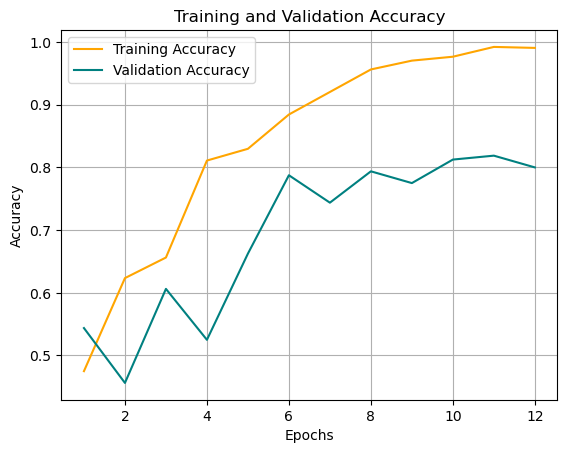

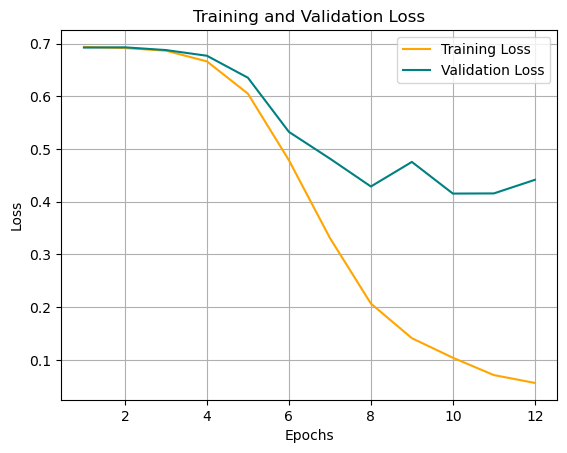

<Figure size 640x480 with 0 Axes>

In [119]:
#Define metrics to visualize
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(1, len(acc)+1)

#Accuracy Visualization
plt.plot(epochs, acc, 'orange', label='Training Accuracy')
plt.plot(epochs, val_acc, 'teal', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.figure();

#Loss Visualization
plt.plot(epochs, loss, 'orange', label='Training Loss')
plt.plot(epochs, val_loss, 'teal', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.figure();

<BR>

## D4. Predictive Accuracy <a class="anchor" id="D4"></a>

The model's training and validation accuracy were 99.0% and 80.0%, respectively. A high training accuracy indicated that the model could learn the inherent patterns of the training data very sufficiently. In comparison, the accuracy of the test set was 76.0%. The test accuracy closely reflects the validation accuracy, indicating that the model can generalize well to unseen data. In conclusion, the model performs very well, given the relatively high predictive accuracy on the test set.

In [123]:
#Model Evaluation on Test set
eval = model.evaluate(X_test, y_test, verbose=0)
print("Loss evaluation:", round(eval[0], 2))
print("Accuracy evaluation:", round(eval[1], 2))

Loss evaluation: 0.53
Accuracy evaluation: 0.76


<BR>

## E. Code <a class="anchor" id="E"></a>

The model is saved as an H5 file called "D213_Task2_Model.h5."

In [106]:
#Save model as an h5 file
model.save('D213_Task2_Model.h5')

<BR>

## F. Functionality <a class="anchor" id="F"></a>

The neural network was trained on the sentiments of Amazon customers and their reviews. Of the data set, 80% was used for training, and the other 20% was used for testing the model. This accounted for 800 records used in training and the other 200 for testing. The model was validated during training and further evaluated with the test set. With that, the model was trained to perform predictive analysis on the sentiment of customer reviews, whether positive or negative. The underlying neural network architecture significantly impacted how the model was trained. This was because of the nature of this analysis, which involved a binary classification problem, wherein the layers making up the neural network had to be tuned in a certain way to support the output of a binary result, indicating a positive or negative review.

<BR>

## G. Recommendations <a class="anchor" id="G"></a>

The validation and evaluation metrics provided good results, so the model can be acceptably used to predict customer sentiment regarding Amazon products and services. Because the model was trained with this type of data in mind, it would be out of scope to determine sentiment in other industries. Furthermore, while the model works reasonably well, it could constantly be improved with more training data, as the data set was relatively small.

<BR>

## H. Reporting <a class="anchor" id="H"></a>

The neural network model was developed in a Jupyter Lab and Notebook environment using the Python programming language. Attached is the Jupyter Notebook of the process called "D213_Task_2_LY.ipynb," and also as a PDF called "D213_Task_2_LY.pdf."

<BR>

## I. Sources for Third-Party Code <a class="anchor" id="I"></a>

No third-party code was used in this analysis.

<BR>

## J. Sources <a class="anchor" id="J"></a>

_Activation functions in neural networks [12 types & use cases]_. V7. (n.d.). https://www.v7labs.com/blog/neural-networks-activation-functions#h3 

Barnard, J. (2024, August 9). _What are word embeddings?_. IBM. https://www.ibm.com/topics/word-embeddings#:~:text=What%20Are%20Word%20Embeddings?,analysis%2C%20machine%20translation%20and%20more. 

GeeksforGeeks. (2024, January 2). _RNN for Text Classifications in NLP_. GeeksforGeeks. https://www.geeksforgeeks.org/rnn-for-text-classifications-in-nlp/ 

Vishwakarma, N. (2024, October 15). _What is Adam Optimizer?_. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2023/09/what-is-adam-optimizer/#h-advantages-of-using-adam-optimizer 